In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0001325670"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0001325670
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,Southern National Bancorp of Virginia Inc
Ticker,SONA


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,14.0,1.105786e+01,2.479855e+00,8.48,9.062500e+00,10.01,1.385250e+01,14.63
interest income,42.0,1.256998e+07,7.930100e+06,3618000.00,8.421500e+06,9443500.00,1.234575e+07,31150000.00
net income,42.0,2.213262e+06,2.454016e+06,-2842000.00,1.142000e+06,1746000.00,2.434000e+06,8867000.00
net interest income,42.0,9.956905e+06,6.147261e+06,1907000.00,6.557000e+06,7994000.00,1.001400e+07,23850000.00
provision for loan losses,42.0,1.310048e+06,1.114652e+06,180000.00,6.062500e+05,1096500.00,1.537500e+06,5250000.00


# Plots

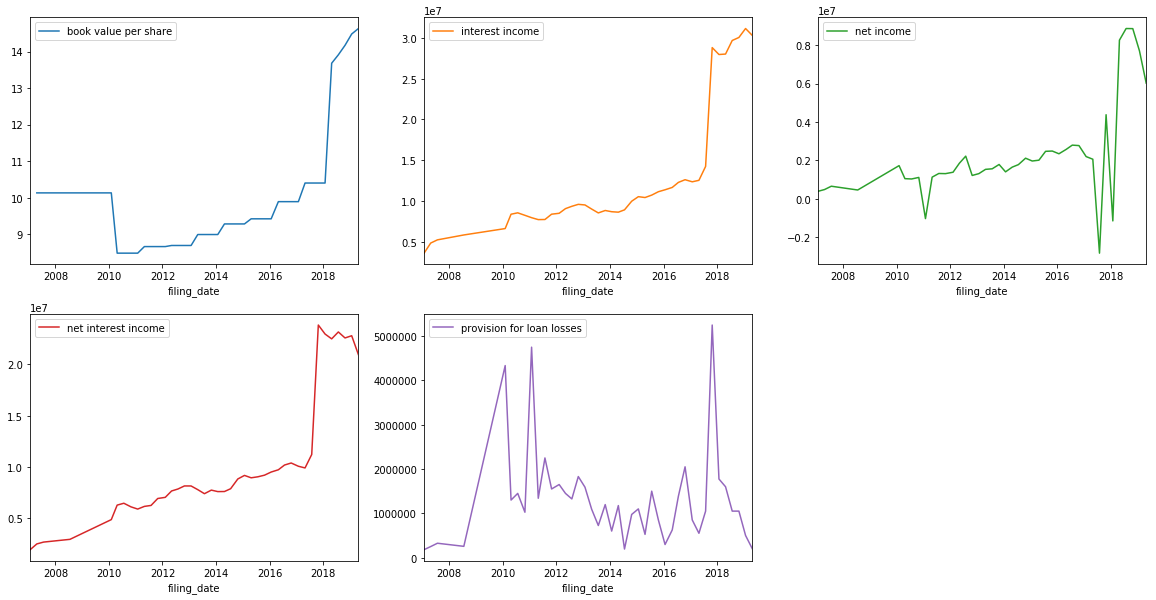

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                               
0001325670 book value per share                             2006Q4  missing   
           book value per share       2007Q2 to 2009Q4: 11 periods  missing   
           book value per share        2010Q2 to 2010Q4: 3 periods  missing   
           book value per share        2011Q2 to 2011Q4: 3 periods  missing   
           book value per share        2012Q2 to 2012Q4: 3 periods  missing   
           book value per share        2013Q2 to 2013Q4: 3 periods  missing   
           book value per share        2014Q2 to 2014Q4: 3 periods  missing   
           book value per share        2015Q2 to 2015Q4: 3 periods  missing   
           book value per share        2016Q2 to 2016Q4: 3 periods  missing   
           book value per share        2017Q2 to 2017Q4: 3 periods  missing   
           interest income             2007Q3 to 2008Q1: 3 periods  missing   
           interest income             2008Q3 to 2009Q3: 5 periods  missing   
           net income                  2007Q3 to 2008Q1: 3 periods  missing   
           net income                  2008Q3 to 2009Q3: 5 periods  missing   
           net interest income         2007Q3 to 2008Q1: 3 periods  missing   
           net interest income         2008Q3 to 2009Q3: 5 periods  missing   
           provision for loan losses   2007Q3 to 2008Q1: 3 periods  missing   
           provision for loan losses   2008Q3 to 2009Q3: 5 periods  missing   
           total revenue                                      None    empty   

                                                 message  
cik        item                                           
0001325670 book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           interest income                Missing period  
           interest income                Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()